In [21]:
import pandas as pd
from collections import Counter
from langdetect import detect
import langdetect
import numpy as np
import importlib
import os
current_dir = os.getcwd()
%cd ..
import textmining.text_miner 
import textmining.topic_modeler as tm

importlib.reload(textmining.text_miner)
importlib.reload(textmining.topic_modeler)
os.chdir(current_dir)

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

C:\Users\elba_ro\Documents\projects\nlpcss2020-editorials-analysis


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elba_ro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
data = pd.read_json('../data/articles_with_adu_liwc_lexicons_content.json', orient='records')
data.set_index('idx', inplace=True)


stop_words_extension = ['editor', 'editorial', 'mr']

mallet_lda_modeler = tm.topic_modeler(data['content'].values.tolist(),
                               stopwords_extension= stop_words_extension)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elba_ro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elba_ro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\elba_ro\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Plotting cohenrence for each K topics

In [23]:
start= 18#125## 85 # 45
step=1
limit=19 # not included


removing stop words...
end removing stop words.
calling lemmatizing:
lemmatization...
end of lemmatization.
Initializing the corpus after lemmatization
training on BOW
18 :    -    coherence: 0.523346385997832
optimal model has a coherence value of  0.52  and # topics:  18


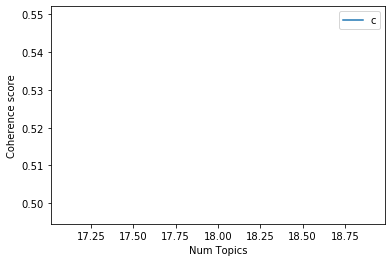

In [24]:
_, coherence_values = mallet_lda_modeler.compute_coherence_values(limit, start=start, step=step, model_type='mallet')


In [25]:
## Saving results 
n = mallet_lda_modeler.num_topics
print('best model has {} topics'.format(n))

coherence_vals_df =  pd.DataFrame({'Number of Topics':range(start, limit, step), 'Coherence Value':coherence_values} )
#coherence_vals_df.to_csv('../out/feature_extraction/lda/ldamallet_coherence_values_{}_{}.csv'.format(start, (limit-1)))

best model has 18 topics


In [26]:
def save_model_info(modeler):
    n = modeler.num_topics
    print('get_doc_dominant_topic')
    lda_readable_document_topics_df =  modeler.get_doc_dominant_topic(save_path= "../out/feature_extraction/lda/ldamallet_readable_document_topics_{}.csv".format(n))
    
    print('get_topics_terms')
    lda_topic_words_df = modeler.get_topics_terms(save_path= "../out/feature_extraction/lda/ldamallet_topic_words_{}.csv".format(n))
    
    print('get_doc_topic_matrix')
    lda_document_topics_df =  modeler.get_doc_topic_matrix(save_path= "../out/feature_extraction/lda/ldamallet_document_topics_{}.csv".format(n))
    
    return lda_readable_document_topics_df, lda_topic_words_df, lda_document_topics_df

In [27]:
lda_readable_document_topics_df, lda_topic_words_df, lda_document_topics_df = save_model_info(mallet_lda_modeler)

get_doc_dominant_topic
get_topics_terms
get_doc_topic_matrix


In [31]:
lda_readable_document_topics_df.head()
lda_readable_document_topics_df.columns = ['dominant_topic', 'perc_contribution', 'topic_keywords', 'content']
lda_readable_document_topics_df

,dominant_topic,perc_contribution,topic_keywords,content
0,11.0,0.3577,"long, county, island, people, project, land, l...",''The familiar and the fancy are combined to s...
1,16.0,0.3150,"state, year, pay, jersey, time, long, make, lo...","A $141,000 salary seems generous, but for judg..."
2,12.0,0.2788,"city, million, plan, space, mayor, bloomberg, ...",A State Supreme Court judge yesterday removed ...
3,11.0,0.3333,"long, county, island, people, project, land, l...",A battle between Yonkers and its neighbors ove...
4,2.0,0.2073,"drug, health, report, study, year, medical, tr...",A bill headed for a vote in the Senate would u...
...,...,...,...,...
974,0.0,0.4204,"united, country, states, world, nuclear, progr...","Yesterday, Unocal shareholders agreed to be bo..."
975,14.0,0.3467,"iraq, american, war, military, force, iraqi, g...","Yesterday, the bloc of Shiite parties that won..."
976,5.0,0.2889,"work, people, worker, police, day, immigration...",You cannot abuse people through selective enfo...
977,12.0,0.2331,"city, million, plan, space, mayor, bloomberg, ...",You don't have to be a space or climate expert...


In [56]:
#data_w_topic[data_w_topic['dominant_topic'] == 7][['content']].to_csv('../out/topic_7_content_trade.csv')
#data_w_topic[data_w_topic['dominant_topic'] == 5][['content']].to_csv('../out/topic_5_imm.csv')

In [36]:


def _add_topics_to_orig(row, doc_topic_df):
    content = row['content']
    found = False
    for i, r in doc_topic_df.iterrows():
        if r['content'] == content:
            found = True
            cols =  ['dominant_topic', 'perc_contribution', 'topic_keywords']
            for c in cols :
                row[c] = r[c]
            break
    if not found:
        print('not found for ', row.name)
    return row

data_w_topic = data.apply(_add_topics_to_orig, args=(lda_readable_document_topics_df,)
                          ,axis=1)

In [42]:
data_w_topic.columns

Index(['adu_anecdote', 'adu_other', 'adu_statistics', 'adu_testimony',
       'conservative_majority', 'content', 'ids', 'liberal_majority',
       'mpqa_arg_assessments', 'mpqa_arg_authority',
       ...
       'lemma3_world trade center', 'lemma3_world trade organ',
       'lemma3_year presid bush', 'lemma3_york public research',
       'lemma3_york state budget', 'lemma3_york state capitol',
       'lemma3_york state legislatur', 'dominant_topic', 'perc_contribution',
       'topic_keywords'],
      dtype='object', length=437)

In [50]:
def _add_str_topiid(row):
    row['id_topic_words'] = str(row['dominant_topic'])+ ': ' + row['topic_keywords']
    return row
data_w_topic = data_w_topic.apply(_add_str_topiid, axis=1)


In [61]:
grouping_topics = {'state': [1,12,11,9,16],
                  'global': [0,7,10,14], #'national':[]}
                  }

def _add_topic_group(row):
    group = 'national'
    row['topic_group']= 'state' if row['dominant_topic'] in grouping_topics['state'] else (
    'global' if row['dominant_topic'] in grouping_topics['global'] else 'national')

    return row
data_w_topic = data_w_topic.apply(_add_topic_group, axis=1)


In [65]:
data_w_topic['topic_group'].value_counts()

national    475
state       277
global      227
Name: topic_group, dtype: int64

In [64]:
data_w_topic[data_w_topic['topic_group'] == 'national']['dominant_topic'].unique()

array([ 2.,  8.,  5.,  6.,  4., 17., 13.,  3., 15.])

In [68]:
data_w_topic[['topic_group', 'dominant_topic']].to_csv('../out/editorials_topic_w_group.csv')

In [70]:
pd.read_csv('../out/editorials_topic_w_group.csv').set_index('idx')

,topic_group,dominant_topic
idx,,
1851784,state,11.0
1845399,state,16.0
1677322,state,12.0
1818732,state,11.0
1844646,national,2.0
...,...,...
1693956,global,0.0
1652153,global,14.0
1806988,national,5.0


## Topics Exploration

#### Topics Keywords

In [8]:
topics_with_perc_df = pd.DataFrame(mallet_lda_modeler.model.print_topics(num_topics=n, num_words=10), 
                                   columns=['Topic', 'Keywords'])
#topics_with_perc_df.reset_index().to_csv('../../data/feature_extraction*/lda_topic_words_45.csv')
mallet_lda_modeler.model.show_topics(num_topics=n, num_words=10, formatted=False)

[(0,
  [('united', 0.03685569304727143),
   ('country', 0.03187038191044245),
   ('states', 0.024214368378883647),
   ('world', 0.02287901718151874),
   ('nuclear', 0.019229057242054662),
   ('program', 0.013887652452595033),
   ('weapon', 0.013887652452595033),
   ('china', 0.01362058221312205),
   ('international', 0.012997418321018427),
   ('iran', 0.012107184189441823)]),
 (1,
  [('state', 0.044611280014891105),
   ('york', 0.03269839300117888),
   ('public', 0.022150524291121177),
   ('governor', 0.02184029285847242),
   ('reform', 0.021405968852764162),
   ('spitzer', 0.019854811689520382),
   ('albany', 0.017993423093627847),
   ('legislator', 0.01557361791896755),
   ('money', 0.014270645901842774),
   ('campaign', 0.013215859030837005)]),
 (2,
  [('drug', 0.0211118930330753),
   ('health', 0.014250527797325828),
   ('report', 0.013546798029556651),
   ('study', 0.012403237156931738),
   ('year', 0.012227304714989444),
   ('medical', 0.010380014074595356),
   ('treatment', 0.01

#### Docs dominant Topics

#### Topic Distribution - See below (Wordlcloud for topic top words)

In [9]:
topic_dstr = mallet_lda_modeler.get_topic_distr()

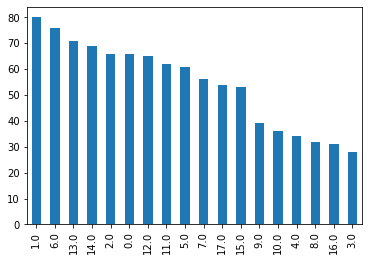

In [10]:
topic_dstr['Dominant_Topic'].value_counts().plot(kind='bar')

In [11]:
topic_dstr.to_csv('../out/feature_extraction/lda/ldamallet_topics_distribution_{}.csv'.format(n))

#### Word Cloud for each Topic

In [12]:
## word cloud
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
def show_word_cloud(model, topics, limit=10, stopwords_extension=[], topic_index=range(1,11)):
    # 1. Wordcloud of Top N words in each topic


    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

    
    stop_words  = stopwords.words('english')
    stop_words.extend(stopwords_extension)
        
    cloud = WordCloud(stopwords=stop_words,
                    background_color='white',
                    width=2500,
                    height=1800,
                    max_words=10,
                    colormap='tab10',
                    color_func=lambda *args, **kwargs: cols[i],
                    prefer_horizontal=1.0)

    
    fig, axes = plt.subplots( int(limit/2), 2, figsize=(10,10), sharex='all', sharey='all')


    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(topic_index[i]), fontdict=dict(size=16))
        plt.gca().axis('off')
        if i> limit:
            break


    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()

In [13]:
topics = mallet_lda_modeler.model.show_topics(num_topics=n, num_words=10, formatted=False)


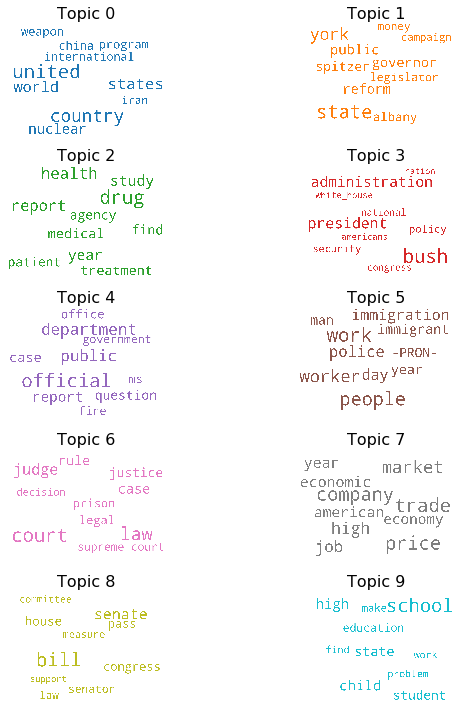

In [14]:
show_word_cloud(mallet_lda_modeler.model, topics[:10],  limit=10, stopwords_extension=stop_words_extension, topic_index=range(0,10))

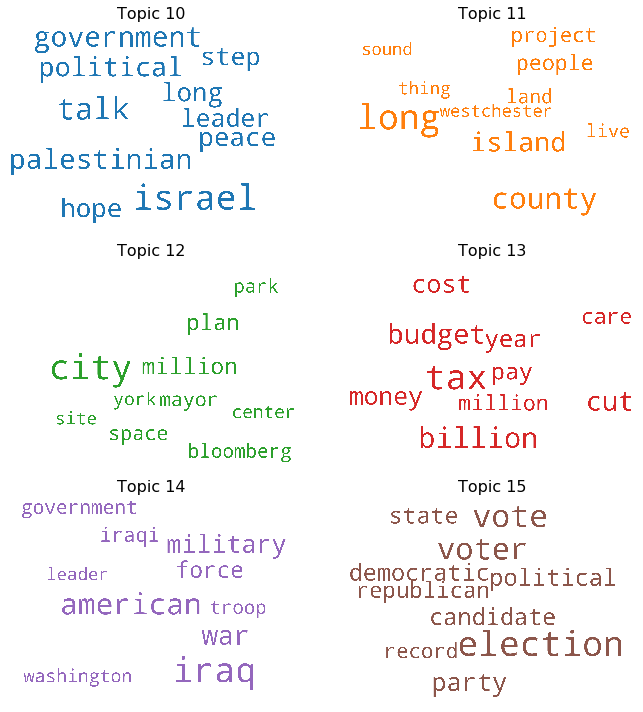

In [15]:
show_word_cloud(mallet_lda_modeler.model, topics[10:17],  limit=7, stopwords_extension=stop_words_extension, topic_index=range(10,17))

In [16]:
n

18

In [ ]:
len(pd.read_csv("../out/feature_extraction/lda/ldamallet_readable_document_topics_18.csv"))
pd.read_csv("../out/feature_extraction/lda/ldamallet_readable_document_topics_18.csv").head()

In [ ]:
pd.read_csv("../out/feature_extraction/lda/ldamallet_document_topics_18.csv").head()